In [26]:
import re
import warnings
import pandas as pd
import numpy as np
import seaborn as sns # for beautiful graphs
import matplotlib.pyplot as plt
import scipy.stats as stats # to calculate r^2 for linear regressions
import statsmodels as sm
import matplotlib.ticker as mtick

from scipy.stats import powerlaw # for plotting linear regressions
from violation_preprocessing import violation_separator, violations_dataframe

sns.set()
warnings.filterwarnings('ignore')

In [27]:
# opening the data
data = pd.read_csv('data/clean_dataset.csv', delimiter = ',')

# drop the unnamed column
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [28]:
# show the dataframe
display(data.head(3))

,inspection_id,dba_name,aka_name,license,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,2345959,DUNKIN DONUTS,DUNKIN DONUTS,1803815.0,Restaurant,Risk 2 (Medium),4453 S ARCHER AVE,60632.0,2019-11-20,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.812307,-87.706919,"{'longitude': '41.81230749019629', 'latitude':..."
1,2345980,A & J KRAZY KITCHEN,A & J KRAZY KITCHEN,2570118.0,Restaurant,Risk 1 (High),7547 W IRVING PARK RD,60634.0,2019-11-20,Complaint,Fail,25. CONSUMER ADVISORY PROVIDED FOR RAW/UNDERCO...,41.952437,-87.816496,"{'longitude': '41.95243739681394', 'latitude':..."
2,2345921,"NEW BANPOJUNG, INC.",Ban Po Chung,1847417.0,Restaurant,Risk 1 (High),3450 W FOSTER AVE,60625.0,2019-11-19,Canvass,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.975778,-87.715618,"{'longitude': '41.97577826268285', 'latitude':..."


# Violation characterization 

For the functions used in this part, we have created a class that contain them. The functions can be found in violation_preprocessing.py

In [29]:
# we apply functions from file violation_preprocessing.py to our basic data 
violation_separated = data.violations.apply(violation_separator).fillna(0)

In [30]:
# we create our dataframe with all the violations counts
violations_df, violations_dataframe = violations_dataframe(violation_separated,data)

In [31]:
violations_dataframe.head(5)

,inspection_id,dba_name,aka_name,license,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,critical_count,serious_count,minor_count,violations_count
0,2345959,DUNKIN DONUTS,DUNKIN DONUTS,1803815.0,Restaurant,Risk 2 (Medium),4453 S ARCHER AVE,60632.0,2019-11-20,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.812307,-87.706919,"{'longitude': '41.81230749019629', 'latitude':...",0.333333,0.333333,0.333333,3.0
1,2345980,A & J KRAZY KITCHEN,A & J KRAZY KITCHEN,2570118.0,Restaurant,Risk 1 (High),7547 W IRVING PARK RD,60634.0,2019-11-20,Complaint,Fail,25. CONSUMER ADVISORY PROVIDED FOR RAW/UNDERCO...,41.952437,-87.816496,"{'longitude': '41.95243739681394', 'latitude':...",0.000000,1.000000,0.000000,1.0
2,2345921,"NEW BANPOJUNG, INC.",Ban Po Chung,1847417.0,Restaurant,Risk 1 (High),3450 W FOSTER AVE,60625.0,2019-11-19,Canvass,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.975778,-87.715618,"{'longitude': '41.97577826268285', 'latitude':...",0.000000,0.000000,0.000000,0.0
3,2345906,HUB 51,HUB 51/T5 M10,2192977.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,60666.0,2019-11-19,Canvass,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,42.008536,-87.914428,"{'longitude': '42.008536400868735', 'latitude'...",0.000000,0.000000,0.000000,0.0
4,2345928,ALBANY CHILD CARE CENTER,ALBANY CHILD CARE CENTER,2215697.0,Daycare Above and Under 2 Years,Risk 1 (High),5954 S ALBANY AVE,60629.0,2019-11-19,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.784667,-87.701011,"{'longitude': '41.784667360966026', 'latitude'...",0.000000,0.000000,0.000000,0.0


# Food Poisoning Analysis

> The aim of this part is to investigate if particular violations can be releveant to predict food poisoning. Each violation is characterized by a number from 1 to 44 + violation number 70. 

In [32]:
food_poisoning_df = violations_df.loc[violations_dataframe['inspection_type'] == 'Suspected Food Poisoning']

In [33]:
food_poisoning_df.head(3)

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,...,#39,#40,#41,#42,#43,#44,#70,inspection_id,license,inspection_type
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2345759,2511920.0,Suspected Food Poisoning
218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2321008,2647777.0,Suspected Food Poisoning
720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2315831,37212.0,Suspected Food Poisoning


> We created a csv file in order to assign a violation name to each number. 

In [34]:
# import violation titles
titles = pd.read_csv("data/liste_colonnes.csv", delimiter = ';')
food_poisoning_df.rename(columns = titles.iloc[0], inplace = True)

In [35]:
# sum binary values for each violation
sums = food_poisoning_df.drop(["inspection_id","license",'inspection_type'], axis = 1).sum()

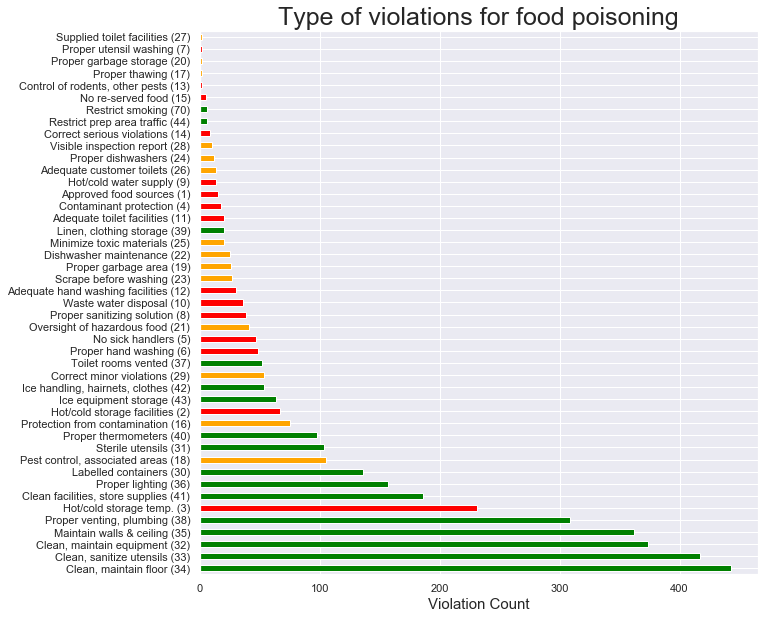

In [36]:
# generate color list
colors = ["red"]*15  + ["orange"]*14  + ["green"]*16 

# sort sums and colors by sum value
sum_data = pd.DataFrame({"sums": sums, "colors": colors}).sort_values("sums")

# plot bar chart
plt.rcParams['figure.figsize'] = (10, 10)
ax = sum_data.sums.plot(kind = "barh", color = sum_data.colors)
ax.set_title("Type of violations for food poisoning", fontsize = 25)
ax.set_xlabel("Violation Count", fontsize = 15)
ax.invert_yaxis()
plt.show()

**Observations**: 
- Critical factors that seems to cause food poisoning : *hot/cold storage temp/facilities* and *hand washing*.
- Serious factors that seems to cause food poisoning : *pest control* and *protection from contamination*

In order to draw a more consistant conclusion, we need to compare this result with other inspections type.

## Comparison with other inspections

In [37]:
other_inspections_df = violations_df.loc[violations_dataframe['inspection_type'] != 'Suspected Food Poisoning']

In [38]:
other_inspections_df.rename(columns = titles.iloc[0], inplace = True)

# Sum binary values for each violation
sums_other = other_inspections_df.drop(["inspection_id","license",'inspection_type'], axis = 1).sum()

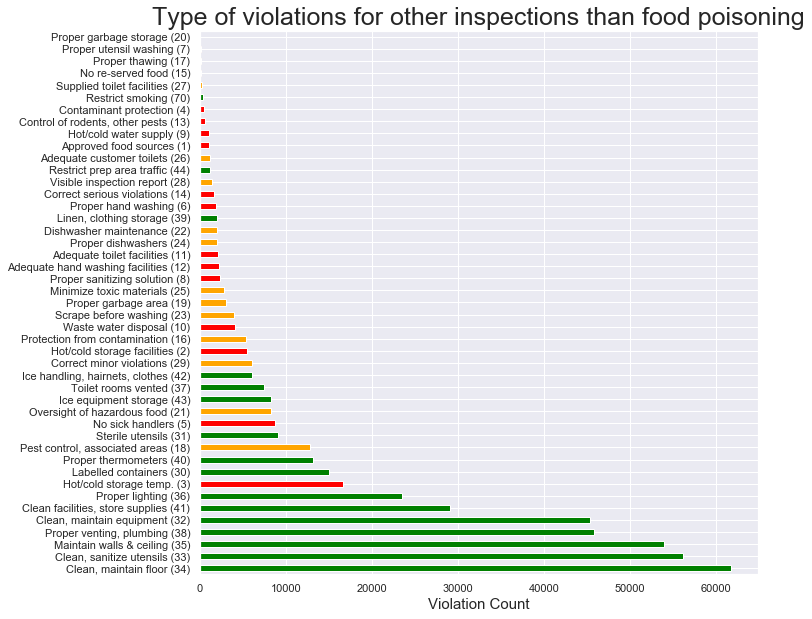

In [39]:
# generate color list
colors = ["red"]*15  + ["orange"]*14  + ["green"]*16 

# sort sums and colors by sum value
sum_data_other = pd.DataFrame({"sums": sums_other, "colors": colors}).sort_values("sums")

# Plot bar chart
plt.rcParams['figure.figsize'] = (10, 10)
ax = sum_data_other.sums.plot(kind = "barh", color = sum_data_other.colors)
ax.set_title("Type of violations for other inspections than food poisoning", fontsize = 25)
ax.set_xlabel("Violation Count", fontsize = 15)
ax.invert_yaxis()
plt.show()

**Observations:** Here again, the major critical violation is *hot/cold storage temperature*. We need to investigate which violations are present in the inspection due to suspected poisoning in a higher proportion than for other inspections.

# Food Poisoning characteristic violations

> We create a dataframe by adding the proportion of each violations for the inspections due to food poisoning and for the other inspections.

In [40]:
#other inspections

# total number of violations within the other inspections dataframe
violation_number = sum_data_other['sums'].sum()

# proportion of each violation
sum_data_other['proportion'] = sum_data_other['sums'].divide(violation_number)*100
sum_data_other = sum_data_other.sort_values('proportion', ascending = False)

print('\n\033[1m Violations for other inspection than food poisoning \033[0m')
display(sum_data_other)


 Violations for other inspection than food poisoning 


,sums,colors,proportion
"Clean, maintain floor (34)",61753.0,green,12.956144
"Clean, sanitize utensils (33)",56157.0,green,11.782070
Maintain walls & ceiling (35),53951.0,green,11.319239
"Proper venting, plumbing (38)",45792.0,green,9.607432
"Clean, maintain equipment (32)",45348.0,green,9.514278
"Clean facilities, store supplies (41)",29114.0,green,6.108289
Proper lighting (36),23516.0,green,4.933796
Hot/cold storage temp. (3),16688.0,red,3.501241
Labelled containers (30),14990.0,green,3.144991
Proper thermometers (40),13175.0,green,2.764193


In [41]:
#inspections due to food poisoning

# total number of violations within the inspections due to food poisoning dataframe
violation_number = sum_data['sums'].sum()

# proportion calculation
sum_data['proportion'] = sum_data['sums'].divide(violation_number)*100
sum_data=sum_data.sort_values('proportion', ascending = False)

print('\n\033[1m Violations for inspections due to food poisoning \033[0m')
display(sum_data)


 Violations for inspections due to food poisoning 


,sums,colors,proportion
"Clean, maintain floor (34)",443.0,green,11.697914
"Clean, sanitize utensils (33)",417.0,green,11.011355
"Clean, maintain equipment (32)",374.0,green,9.875891
Maintain walls & ceiling (35),362.0,green,9.559018
"Proper venting, plumbing (38)",309.0,green,8.159493
Hot/cold storage temp. (3),231.0,red,6.099815
"Clean facilities, store supplies (41)",186.0,green,4.911539
Proper lighting (36),157.0,green,4.145762
Labelled containers (30),136.0,green,3.591233
"Pest control, associated areas (18)",105.0,orange,2.772643


> We need to merge the dataframe.

In [42]:
# we merge to previous dataframe to compare the proportion
comparison = pd.merge(sum_data, sum_data_other, left_index = True, right_index = True, suffixes = ('_poisoning','_others')).sort_values('proportion_poisoning', ascending = False).reset_index()
del comparison['colors_others']

# associate a number to each value of the feature
work_mapper = {'red':'critical','orange':'severe','green':'minor'}

# replace them in the dataframe
comparison['colors_poisoning'] = comparison['colors_poisoning'].replace(work_mapper)
comparison.rename(columns = {'colors_poisoning': 'violation_type','index':'violations'}, inplace = True)

We need to create a dataframe with the violations present in high proportion in the inspection due to food poisoning suspection compared to other inspections.

In [43]:
high_risk = comparison[comparison['proportion_poisoning'] > comparison['proportion_others']]
high_risk['ratio'] = high_risk['proportion_poisoning'].divide(high_risk['proportion_others'])
high_risk.sort_values('ratio', ascending = False)

,violations,sums_poisoning,violation_type,proportion_poisoning,sums_others,proportion_others,ratio
30,Contaminant protection (4),18.0,critical,0.475310,471.0,0.098819,4.809928
39,No re-served food (15),5.0,critical,0.132031,136.0,0.028534,4.627198
18,Proper hand washing (6),49.0,critical,1.293900,1847.0,0.387512,3.338998
41,Proper garbage storage (20),2.0,severe,0.052812,82.0,0.017204,3.069751
21,Proper sanitizing solution (8),39.0,critical,1.029839,2330.0,0.488848,2.106666
42,Proper utensil washing (7),2.0,critical,0.052812,120.0,0.025177,2.097663
38,Restrict smoking (70),6.0,minor,0.158437,378.0,0.079307,1.997774
40,Proper thawing (17),2.0,severe,0.052812,135.0,0.028324,1.864589
12,Protection from contamination (16),75.0,severe,1.980459,5360.0,1.124560,1.761098
5,Hot/cold storage temp. (3),231.0,critical,6.099815,16688.0,3.501241,1.742187


**Observations :** Some violations are 4 time more frequent in the case of inspection due to suspected food poisoning. Plus, the 3 more frequent violations compared to the others inspections are critical. Thus, we can emit the hypothesis that we can predict a food poisoning based on the kind of violations noticed during an inspection.